In [1]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt

# 定義梯度下降批量
batch_size = 256
# 定義分類數量
num_classes = 10
# 定義訓練週期
epochs = 15

# 定義圖像寬、高
img_rows, img_cols = 28, 28

# 載入 MNIST 訓練資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 保留原始資料，供 cross tab function 使用
y_test_org = y_test

# channels_first: 色彩通道(R/G/B)資料(深度)放在第2維度，第3、4維度放置寬與高
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # channels_last: 色彩通道(R/G/B)資料(深度)放在第4維度，第2、3維度放置寬與高
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 轉換色彩 0~255 資料為 0~1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y 值轉成 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.7006 - accuracy: 0.8058 - val_loss: 0.2064 - val_accuracy: 0.9400
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1720 - accuracy: 0.9497 - val_loss: 0.0993 - val_accuracy: 0.9709
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1081 - accuracy: 0.9683 - val_loss: 0.0700 - val_accuracy: 0.9777
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0834 - accuracy: 0.9755 - val_loss: 0.0551 - val_accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0696 - accuracy: 0.9800 - val_loss: 0.0485 - val_accuracy: 0.9848
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0615 - accuracy: 0.9818 - val_loss: 0.0454 - val_accuracy: 0.9851
Epoch 7/10
60000/60000 [==============================] - 2s 42us/st

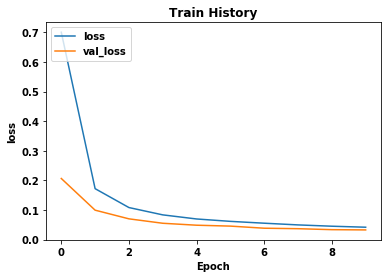

In [3]:
#####---------------------------------------改良版模型---------------------------------------#####
model2=Sequential()
# 第一層conv2D更改Mask大小從3->9
model2.add(Conv2D(32, kernel_size=(9, 9),activation='relu',input_shape=input_shape))

model2.add(Conv2D(64, (3, 3), activation='relu'))

# 建立池化層，池化大小=2x2，取最大值
model2.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model2.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model2.add(Flatten())
# 更改數值成0.5->0.25
model2.add(Dropout(0.25))
# 使用 softmax activation function，將結果分類
model2.add(Dense(num_classes, activation='softmax'))

# 更改optimizer Adadelta->Adam
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# 更改batch size 256->1024 epochs 15->10
train_history = model2.fit(x_train, y_train,
          batch_size=1024,
          epochs=10,
          #verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
#model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.3633 - accuracy: 0.8892 - val_loss: 0.0845 - val_accuracy: 0.9732
Epoch 2/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.1082 - accuracy: 0.9677 - val_loss: 0.0498 - val_accuracy: 0.9832
Epoch 3/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.0777 - accuracy: 0.9775 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 4/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0367 - val_accuracy: 0.9867
Epoch 5/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 6/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0317 - val_accuracy: 0.9890
Epoch 7/15
60000/60000 [==============================] - 4s 74us/st

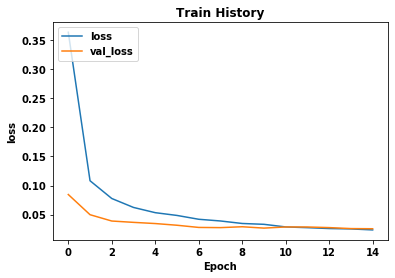

In [4]:
#####---------------------------------------尚未修改的模型---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(128, activation='relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
# model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()